In [256]:
import torch
import torchvision
import matplotlib.pyplot as plt

In [257]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using {device}.')

Using cuda.


## Data Loading

In [258]:
def load_data_CIFAR_10(batch_size, resize=None):
    """Download the CIFAR_10 dataset and then load it into memory."""
    trans = [torchvision.transforms.ToTensor()]
    if resize:
        trans.insert(0, torchvision.transforms.Resize(resize))
    trans = torchvision.transforms.Compose(trans)

    cifar_train = torchvision.datasets.CIFAR10(root="./data", train=True, transform=trans, download=True)
    cifar_test = torchvision.datasets.CIFAR10(root="./data", train=False, transform=trans, download=True)

    return (torch.utils.data.DataLoader(cifar_train, batch_size, shuffle=True, num_workers=2, pin_memory=True), # Using pinned memory
            torch.utils.data.DataLoader(cifar_test, batch_size, shuffle=False, num_workers=2, pin_memory=True)) # Using pinned memory

In [259]:
train_iter, test_iter = load_data_CIFAR_10(128) # batch size is 128

Files already downloaded and verified
Files already downloaded and verified


In [260]:
X, Y = next(iter(train_iter))
print(X.shape)
print(Y.shape)

torch.Size([128, 3, 32, 32])
torch.Size([128])


## Generate Intermediate Blocks

In [261]:
class IntBlock1(torch.nn.Module):
  def __init__(self, input_channels, output_channels):
    super(IntBlock1,self).__init__()
    self.Linear_par = torch.nn.Linear(input_channels, 4)
    self.BN = torch.nn.BatchNorm2d(output_channels)
    self.maxpool = torch.nn.MaxPool2d(kernel_size=3, stride=2, padding=1)

    self.Conv1 = torch.nn.Conv2d(input_channels, output_channels, kernel_size=1, padding=1, stride=1)
    self.Sigmoid = torch.nn.Sigmoid()

    self.Conv2 = torch.nn.Conv2d(input_channels, output_channels, kernel_size=3, padding=2, stride=1 )
    self.Relu = torch.nn.ReLU()


    self.Conv3 = torch.nn.Conv2d(input_channels, output_channels, kernel_size=5, padding=3, stride=1)
 

    self.Conv4 = torch.nn.Conv2d(input_channels, output_channels, kernel_size=7, padding=4, stride=1)


  def lin_parameters(self,x):
        mean = torch.mean(torch.flatten(x, 2), dim=2)
        a = self.Linear_par(mean)
        return a
    
  
  def forward(self,x):
    a = self.lin_parameters(x)
    a1 = a[:, 0].unsqueeze(1).unsqueeze(2).unsqueeze(3)
    a2 = a[:, 1].unsqueeze(1).unsqueeze(2).unsqueeze(3)
    a3 = a[:, 2].unsqueeze(1).unsqueeze(2).unsqueeze(3)
    a4 = a[:, 3].unsqueeze(1).unsqueeze(2).unsqueeze(3)
      
    out1 = self.Conv1(x)
    out1 = self.Relu(out1)
    out1 =  out1 * a1

    out2 = self.Conv2(x)
    out2 = self.Relu(out2)
    out2 = out2 * a2

    out3 = self.Conv3(x)
    out3 = self.Relu(out3)
    out3 = out3 * a3

    out4 = self.Conv4(x)
    out4 = self.Relu(out4)
    out4 = out4 * a4
    

    out = out1 + out2 + out3 + out4
    out = self.BN(out)
    return out



In [262]:
class IntBlock2(torch.nn.Module):
  def __init__(self, input_channels, output_channels):
    super(IntBlock2,self).__init__()
    self.Linear_par = torch.nn.Linear(input_channels, 4)
    self.BN = torch.nn.BatchNorm2d(output_channels)
    self.maxpool = torch.nn.MaxPool2d(kernel_size=3, stride=2, padding=1)

    self.Conv1 = torch.nn.Conv2d(input_channels, output_channels, kernel_size=1, padding=1, stride=1)
    self.Sigmoid = torch.nn.Sigmoid()

    self.Conv2 = torch.nn.Conv2d(input_channels, output_channels, kernel_size=3, padding=2, stride=1 )
    self.Relu = torch.nn.ReLU()


    self.Conv3 = torch.nn.Conv2d(input_channels, output_channels, kernel_size=5, padding=3, stride=1)
 

    self.Conv4 = torch.nn.Conv2d(input_channels, output_channels, kernel_size=7, padding=4, stride=1)


  def lin_parameters(self,x):
        mean = torch.mean(torch.flatten(x, 2), dim=2)
        a = self.Linear_par(mean)
        return a
  
  def forward(self,x):
    a = self.lin_parameters(x)
    a1 = a[:, 0].unsqueeze(1).unsqueeze(2).unsqueeze(3)
    a2 = a[:, 1].unsqueeze(1).unsqueeze(2).unsqueeze(3)
    a3 = a[:, 2].unsqueeze(1).unsqueeze(2).unsqueeze(3)
    a4 = a[:, 3].unsqueeze(1).unsqueeze(2).unsqueeze(3)
      
    out1 = self.Conv1(x)
    out1 = self.Relu(out1)
    out1 =  out1 * a1

    out2 = self.Conv2(x)
    out2 = self.Relu(out2)
    out2 = out2 * a2

    out3 = self.Conv3(x)
    out3 = self.Relu(out3)
    out3 = out3 * a3

    out4 = self.Conv4(x)
    out4 = self.Relu(out4)
    out4 = out4 * a4
    

    out = out1 + out2 + out3 + out4
    out = self.BN(out)
    return out



In [263]:
class IntBlock3(torch.nn.Module):
  def __init__(self, input_channels, output_channels):
    super(IntBlock3,self).__init__()
    self.Linear_par = torch.nn.Linear(input_channels, 4)
    self.BN = torch.nn.BatchNorm2d(output_channels)
    self.maxpool = torch.nn.MaxPool2d(kernel_size=3, stride=2, padding=1)

    self.Conv1 = torch.nn.Conv2d(input_channels, output_channels, kernel_size=1, padding=1, stride=1)
    self.Sigmoid = torch.nn.Sigmoid()

    self.Conv2 = torch.nn.Conv2d(input_channels, output_channels, kernel_size=3, padding=2, stride=1 )
    self.Relu = torch.nn.ReLU()


    self.Conv3 = torch.nn.Conv2d(input_channels, output_channels, kernel_size=5, padding=3, stride=1)
 

    self.Conv4 = torch.nn.Conv2d(input_channels, output_channels, kernel_size=7, padding=4, stride=1)


  def lin_parameters(self,x):
    mean = torch.mean(torch.flatten(x, 2), dim=2)
    a = self.Linear_par(mean)
    return a
  
  def forward(self,x):
    a = self.lin_parameters(x)
    a1 = a[:, 0].unsqueeze(1).unsqueeze(2).unsqueeze(3)
    a2 = a[:, 1].unsqueeze(1).unsqueeze(2).unsqueeze(3)
    a3 = a[:, 2].unsqueeze(1).unsqueeze(2).unsqueeze(3)
    a4 = a[:, 3].unsqueeze(1).unsqueeze(2).unsqueeze(3)

    out1 = self.Conv1(x)
    out1 = self.Relu(out1)
    out1 = out1 * a1

    out2 = self.Conv2(x)
    out2 = self.Relu(out2)
    out2 = out2 * a2

    out3 = self.Conv3(x)
    out3 = self.Relu(out3)
    out3 = out3 * a3

    out4 = self.Conv4(x)
    out4 = self.Relu(out4)
    out4 = out4 * a4
    

    out = out1 + out2 + out3 + out4
    out = self.BN(out)
    return out



## Generate Macro Block

In [264]:
class MacroBlock(torch.nn.Module):
  def __init__(self, input_channels, output_channels):
    super(MacroBlock,self).__init__()
    self.Conv1 = IntBlock1(input_channels, 32)
    self.Conv2 = IntBlock2(32, 64)
    self.Conv3 = IntBlock3(64, 128)
    self.Flatten = torch.nn.Flatten()
    self.Linear1 = torch.nn.Linear(128,10)
  def forward(self, x):
    out = self.Conv1(x)
    out = self.Conv2(out)
    out = self.Conv3(out)
    out = torch.mean(torch.flatten(out, 2), dim=2)
    out = self.Linear1(out)
    return out



In [265]:
# Applies Xavier initialization if the `torch.nn.Module` is `torch.nn.Linear` or `torch.nn.Conv2d`
def init_weights(m):
  if type(m) == torch.nn.Linear or type(m) == torch.nn.Conv2d:
    torch.nn.init.xavier_uniform_(m.weight)

model = MacroBlock(3, 128).to(device)
model.apply(init_weights)


MacroBlock(
  (Conv1): IntBlock1(
    (Linear_par): Linear(in_features=3, out_features=4, bias=True)
    (BN): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (Conv1): Conv2d(3, 32, kernel_size=(1, 1), stride=(1, 1), padding=(1, 1))
    (Sigmoid): Sigmoid()
    (Conv2): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (Relu): ReLU()
    (Conv3): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1), padding=(3, 3))
    (Conv4): Conv2d(3, 32, kernel_size=(7, 7), stride=(1, 1), padding=(4, 4))
  )
  (Conv2): IntBlock2(
    (Linear_par): Linear(in_features=32, out_features=4, bias=True)
    (BN): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (Conv1): Conv2d(32, 64, kernel_size=(1, 1), stride=(1, 1), padding=(1, 1))
    (Sigmo

In [266]:
loss = torch.nn.CrossEntropyLoss()

In [267]:
lr = 0.008 # learning rate is 0.008
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [268]:
def correct(logits, y):
  y_hat = logits.argmax(axis=1)
  return (y_hat == y).float().sum()

In [269]:
def evaluate_metric(model, data_iter, metric):
  t = torch.tensor(0.).to(device)
  n = torch.tensor(0.).to(device)
  for x, y in data_iter:
    x, y = x.to(device) , y.to(device)
    logits = model(x)
    t += metric(logits, y)
    n += len(y)
  return float(t / n)

## Training

epoch 1/30:
Training accuracy: 0.3043400049209595  Testing accuracy: 0.3084999918937683
epoch 2/30:
Training accuracy: 0.4346199929714203  Testing accuracy: 0.43130001425743103
epoch 3/30:
Training accuracy: 0.5994200110435486  Testing accuracy: 0.5940999984741211
epoch 4/30:
Training accuracy: 0.5885599851608276  Testing accuracy: 0.5784000158309937
epoch 5/30:
Training accuracy: 0.6832600235939026  Testing accuracy: 0.6678000092506409
epoch 6/30:
Training accuracy: 0.7066799998283386  Testing accuracy: 0.6827999949455261
epoch 7/30:
Training accuracy: 0.7636399865150452  Testing accuracy: 0.7343000173568726
epoch 8/30:
Training accuracy: 0.7861199975013733  Testing accuracy: 0.7404999732971191
epoch 9/30:
Training accuracy: 0.8016600012779236  Testing accuracy: 0.7542999982833862
epoch 10/30:
Training accuracy: 0.8374599814414978  Testing accuracy: 0.7774999737739563
epoch 11/30:
Training accuracy: 0.8360000252723694  Testing accuracy: 0.7635999917984009
epoch 12/30:
Training accurac

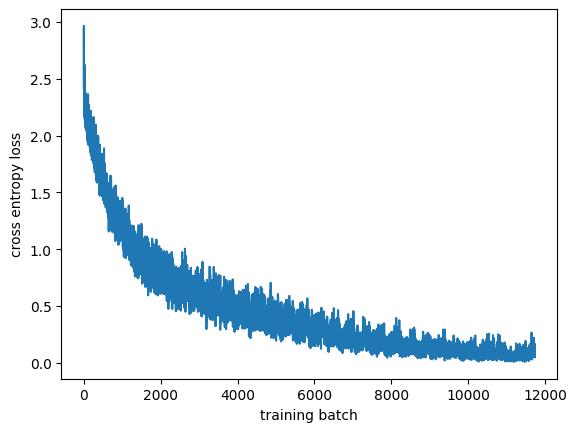

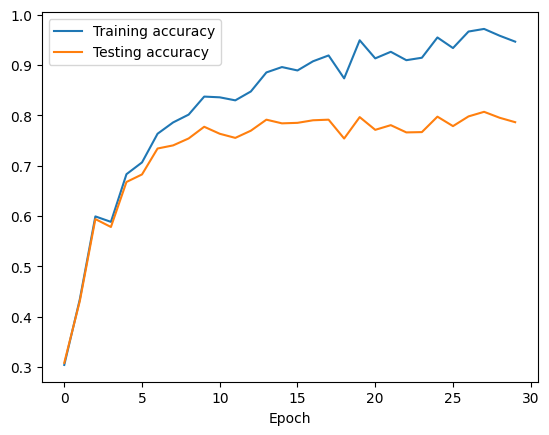

In [270]:
losses = [] # Stores the loss for each training batch
train_accs = [] # Stores the training accuracy after each epoch
test_accs = []  # Stores the testing accuracy after each epoch
num_epochs = 30
for n in range(num_epochs):
  model.train() # This is necessary because batch normalization behaves differently between training and evaluation
  for x, y in train_iter:
    x, y = x.to(device), y.to(device) # Moves data to `device`
    logits = model(x) # Computes the logits for the batch of images `x`
    l = loss(logits, y) # Computes the loss given the `logits` and the class vector `y`
    optimizer.zero_grad() # Zeroes the gradients stored in the model parameters
    l.backward() # Computes the gradient of the loss `l` with respect to the model parameters
    optimizer.step() # Updates the model parameters based on the gradients stored inside them
    losses.append(float(l)) # Stores the loss for this batch

  model.eval() # This is necessary because batch normalization behaves differently between training and evaluation
  train_accs.append(evaluate_metric(model, train_iter, correct))
  test_accs.append(evaluate_metric(model, test_iter, correct))
  print(f'epoch {n + 1}/{num_epochs}:')
  print(f'Training accuracy: {train_accs[-1]}  Testing accuracy: {test_accs[-1]}')

plt.plot(losses)
plt.xlabel('training batch')
plt.ylabel('cross entropy loss')
plt.show()

plt.plot(train_accs, label='Training accuracy')
plt.plot(test_accs, label='Testing accuracy')
plt.legend(loc='best')
plt.xlabel('Epoch')
plt.show()
